# Import lib

In [3]:
import os
import cv2
import math
import random
import pandas as pd 
import numpy as np
from tqdm import tqdm
from sklearn import metrics
from sklearn.model_selection import train_test_split
tqdm.pandas()
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# Get data

In [2]:
SAMPLE_LEN = 100

IMAGE_PATH ="D:\\Coding_practice\\_Data\\SIIM-ISIC_data\\train\\"

TRAIN_PATH ="D:\\Coding_practice\\_Data\\SIIM-ISIC_data\\train.csv"

TEST_PATH = "D:\\Coding_practice\\_Data\\SIIM-ISIC_data\\test.csv"

SUBMISSION_PATH = "D:\\Coding_practice\\_Data\\SIIM-ISIC_data\\sample_submission.csv"

train_data = pd.read_csv(TRAIN_PATH)
test_data = pd.read_csv(TEST_PATH)
sub = pd.read_csv(SUBMISSION_PATH)

In [3]:
train_data.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [4]:
test_data.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [5]:
def load_image(image_id):
    file_path = image_id + ".jpg"
    image = cv2.imread(IMAGE_PATH + file_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [6]:
sample_class = np.where(train_data['target']==0)
show_images = train_data['image_name'][list(sample_class)[0][:SAMPLE_LEN]].progress_apply(load_image)


100%|██████████| 100/100 [00:19<00:00,  5.04it/s]


In [27]:
show_images.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
             26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
             39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
             52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
             65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
             78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
             92,  93,  94,  95,  96,  97,  98,  99, 100],
           dtype='int64')

# Visualize one image (for certain class)

In [35]:
fig = px.imshow(cv2.resize(show_images[random.choice(show_images.index)],(205,136)))
fig.show()

# Visualize multiple images

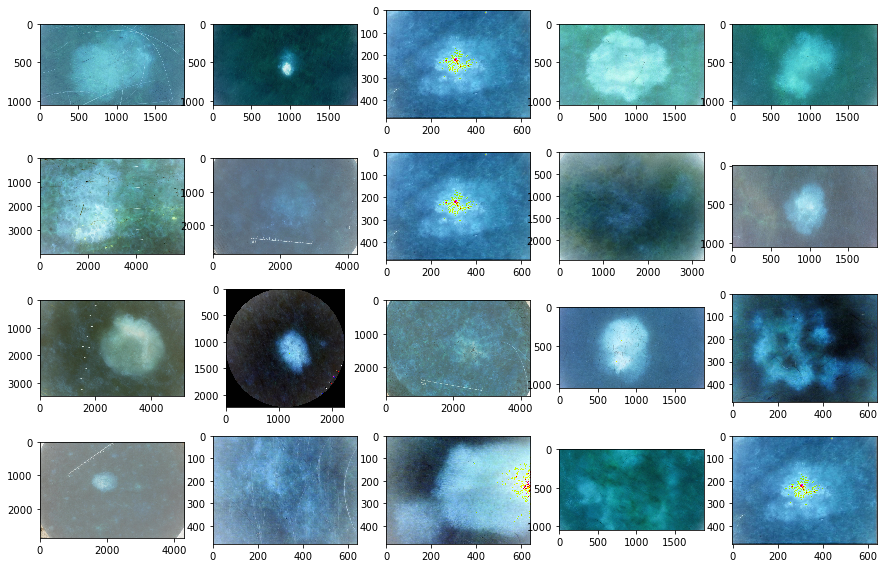

In [11]:
fig = plt.figure(figsize=(15,10))
columns = 5
rows = 4
np.random.seed(1)
random.seed(1)
sample_class = np.where(train_data['target']==1)
show_data = train_data['image_name'][list(sample_class)[0][:SAMPLE_LEN]]
for i in range(1, columns*rows +1):
    get_image = show_data[random.choice(show_data.index)]
    image_path = get_image + ".jpg"
    img_show = cv2.imread(IMAGE_PATH + image_path)
    img_show = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i)
    plt.imshow(-img_show, cmap=plt.cm.bone)
    fig.add_subplot